In [1]:
%matplotlib notebook

import copy

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D

from classes.Settings import Settings
from helpers.geometry_helpers import make_avg_fragment_if_not_exists
from helpers.helpers import read_results_alignment
from helpers.plot_functions import plot_density, plot_fragment_colored, plot_vdw_spheres
from helpers.density_helpers import count_bins_in_vdw, calc_distances

from sklearn.cluster import KMeans

from tqdm import tqdm
import time
import math
import copy

In [2]:
resolutions = []
resolutions0 = np.arange(0.02, 0.1, 0.01)
resolutions.extend(resolutions0)

resolutions1 = np.arange(0.1, 1.1, 0.1)
resolutions.extend(resolutions1)

## Volume central group

In [3]:
settings = Settings("..\\results\\H2O\\H2O_CF_vdw.5\\H2O_CF_vdw.5_aligned.csv")
settings.set_atom_to_count("F")

df = read_results_alignment(settings.get_aligned_csv_filename())
avg_fragment = make_avg_fragment_if_not_exists(settings, df)

print(avg_fragment)
vec1 = np.array([avg_fragment[avg_fragment.atom_label == "O2"].atom_x, avg_fragment[avg_fragment.atom_label == "O2"].atom_y, avg_fragment[avg_fragment.atom_label == "O2"].atom_z])
vec2 = np.array([avg_fragment[avg_fragment.atom_label == "H3"].atom_x, avg_fragment[avg_fragment.atom_label == "H3"].atom_y, avg_fragment[avg_fragment.atom_label == "H3"].atom_z])
vec2 = vec1 - vec2

dist1 = np.linalg.norm(vec1)
dist2 = np.linalg.norm(vec2)

angle = np.arccos(np.dot(vec1.T, vec2) / (dist1 * dist2))
print(dist1, dist2, np.rad2deg(angle[0])[0])

  atom_label atom_symbol    atom_x        atom_y        atom_z  vdw_radius
0         H1           H  0.000000  0.000000e+00  0.000000e+00        1.09
1         H3           H  1.131047  8.129646e-01 -5.680242e-17        1.09
2         O2           O  0.866111 -1.051792e-16 -2.394653e-17        1.52
0.8661108586162624 0.8550454989215917 108.0502384306134


In [5]:
settings = Settings(".\\results\\H2O\\H2O_CF_vdw.5\\H2O_CF_vdw.5_aligned.csv")
settings.set_atom_to_count("F")
settings.set_resolution(0.1)

df = read_results_alignment(settings.get_aligned_csv_filename())
avg_fragment = make_avg_fragment_if_not_exists(settings, df)

print(avg_fragment)

volume_df, amount_bins = count_bins_in_vdw(avg_fragment, settings)

print('Bins:', amount_bins)
print('Volume:', amount_bins * settings.resolution**3)

  atom_label atom_symbol    atom_x        atom_y        atom_z  vdw_radius
0         H1           H  0.000000  0.000000e+00  0.000000e+00        1.09
1         H3           H  1.131047  8.129646e-01 -5.680242e-17        1.09
2         O2           O  0.866111 -1.051792e-16 -2.394653e-17        1.52
Bins: 143615.0
Volume: 143.61500000000004


,xstart,ystart,zstart,F,x_center,y_center,z_center,in_vdw_volume
0,-2.700000,-3.100000,-3.100000,0.0,-2.650000,-3.050000,-3.050000,0.0
1,-2.700000,-3.100000,-3.001587,0.0,-2.650000,-3.050000,-2.951587,0.0
2,-2.700000,-3.100000,-2.903175,0.0,-2.650000,-3.050000,-2.853175,0.0
3,-2.700000,-3.100000,-2.804762,0.0,-2.650000,-3.050000,-2.754762,0.0
4,-2.700000,-3.100000,-2.706349,0.0,-2.650000,-3.050000,-2.656349,0.0
...,...,...,...,...,...,...,...,...
287023,3.901471,3.401493,2.607937,0.0,3.951471,3.451493,2.657937,0.0
287024,3.901471,3.401493,2.706349,0.0,3.951471,3.451493,2.756349,0.0
287025,3.901471,3.401493,2.804762,0.0,3.951471,3.451493,2.854762,0.0
287026,3.901471,3.401493,2.903175,0.0,3.951471,3.451493,2.953175,0.0


<IPython.core.display.Javascript object>


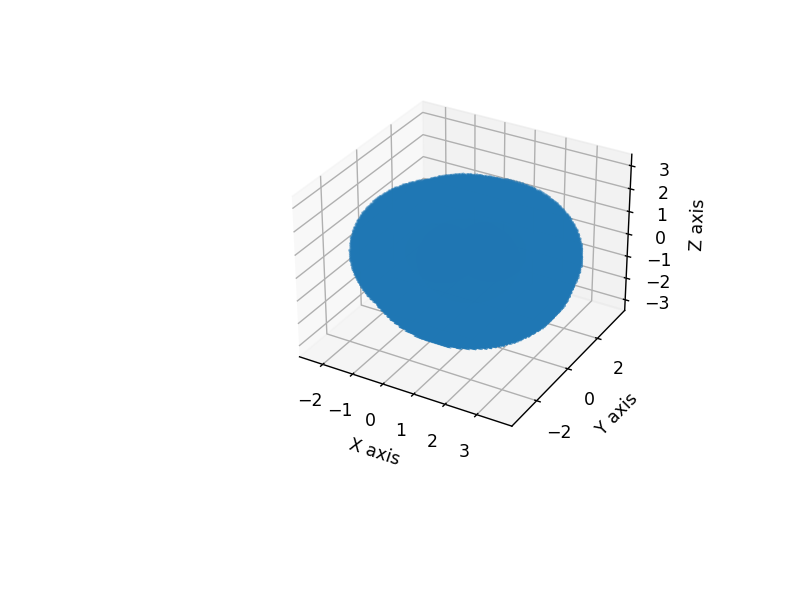

Text(0.5, 0, 'Z axis')

In [6]:
display(volume_df)

plot_bins = volume_df[volume_df.in_vdw_volume > 0]

fig = plt.figure()
ax: Axes3D = fig.add_subplot(111, projection='3d')
plt.subplots_adjust(left=0.25, bottom=0.25)

ax.margins(x=0)
ax = plot_fragment_colored(ax, avg_fragment)

# Create vdw spheres around central group atoms
ax, spheres1 = plot_vdw_spheres(avg_fragment, ax, 'red')

ax.scatter(plot_bins.x_center, plot_bins.y_center, plot_bins.z_center, s=0.2)

ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")

# Here come the long calculations

In [7]:
settings = Settings(".\\results\\H2O\\H2O_CF_vdw.5\\H2O_CF_vdw.5_aligned.csv")
settings.set_atom_to_count("F")

H2O_bins = []
H2O_comp_time = []

for resolution in resolutions:
    print(round(resolution,2))

    starttime = time.time()
    settings.set_resolution(round(resolution,2))

    _, total = count_bins_in_vdw(avg_fragment, settings)
    
    H2O_bins.append(total)
    H2O_comp_time.append(time.time() - starttime)

0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0


In [38]:
settings = Settings(".\\results\\Pyreen\\pyreen_CF_vdw.5\\pyreen_CF_vdw.5_aligned.csv")
settings.set_atom_to_count("F")

df = read_results_alignment(settings.get_aligned_csv_filename())
avg_fragment = make_avg_fragment_if_not_exists(settings, df)

NO3_bins = []
NO3_comp_time = []

for resolution in resolutions:
    print(round(resolution,2))
    starttime = time.time()

    settings.set_resolution(round(resolution,2))
    _, total = count_bins_in_vdw(avg_fragment, settings)
    NO3_bins.append(total)

    NO3_comp_time.append(time.time() - starttime)


              id  entry_id atom_label atom_symbol  in_central_group    atom_x  \
0        COYXOG1    COYXOG         C6           C              True  0.009341   
1        COYXOG1    COYXOG         C5           C              True -1.187145   
2        COYXOG1    COYXOG        C16           C              True -1.212227   
3        COYXOG1    COYXOG        C15           C              True -0.027457   
4        COYXOG1    COYXOG        C14           C              True  1.208810   
...          ...       ...        ...         ...               ...       ...   
14107  CENTOH018  CENTOH01        H24           H              True  5.700599   
14108  CENTOH018  CENTOH01        H11           H              True  4.557876   
14109  CENTOH018  CENTOH01         H8           H              True  2.480438   
14110  CENTOH018  CENTOH01         C5           C             False  5.511867   
14111  CENTOH018  CENTOH01         F3           F             False  6.419907   

         atom_y    atom_z  

MemoryError: Unable to allocate 1011. MiB for an array with shape (1, 132452960) and data type int64

In [ ]:
settings = Settings(".\\results\\RC6H5\\RC6H5_CF_vdw.5\RC6H5_CF_vdw.5_aligned.csv")
settings.set_atom_to_count("F")

df = read_results_alignment(settings.get_aligned_csv_filename())
avg_fragment = make_avg_fragment_if_not_exists(settings, df)

RC6H5_bins = []
RC6H5_comp_time = []

for resolution in resolutions:
    print(round(resolution,2))
    
    starttime = time.time()
    settings.set_resolution(round(resolution,2))
    rough_estimation(avg_fragment, settings)
    
    _, total = count_bins_in_vdw(avg_fragment, settings)
    RC6H5_bins.append(total)

    RC6H5_comp_time.append(time.time() - starttime)

In [ ]:
settings = Settings(".\\results\\RC6F5\\RC6F5_CF_vdw.5\RC6F5_CF_vdw.5_aligned.csv")
settings.set_atom_to_count("F")

df = read_results_alignment(settings.get_aligned_csv_filename())
avg_fragment = make_avg_fragment_if_not_exists(settings, df)

RC6F5_bins = []
RC6F5_comp_time = []

for resolution in resolutions:
    print(round(resolution,2))
    starttime = time.time()
    settings.set_resolution(round(resolution,2))
    rough_estimation(avg_fragment, settings)
    
    _, total = count_bins_in_vdw(avg_fragment, settings)
    RC6F5_bins.append(total)

    RC6F5_comp_time.append(time.time() - starttime)

# Save results

In [13]:
import csv

print(len(H2O_bins))#, len(NO3_bins), len(RC6H5_bins), len(RC6F5_bins), len(RC6H5_comp_time), len(RC6F5_comp_time))
# RC6H5_bins.append(np.nan)
# RC6F5_bins.append(np.nan)
# RC6F5_comp_time.append(np.nan)
# RC6H5_comp_time.append(np.nan)
print(resolutions)

# save
with open("h2o_h.csv", "a", newline='') as resultsFile:
    writer = csv.writer(resultsFile, delimiter=",")
    
    for i in range(len(resolutions)):
        print(round(resolutions[i], 2), H2O_bins[i]) #, NO3_bins[i], RC6H5_bins[i], RC6F5_bins[i])
    
        writer.writerow([round(resolutions[i], 2), H2O_bins[i], H2O_comp_time[i]]) #, NO3_bins[i], NO3_comp_time[i], 
#                          RC6H5_bins[i], RC6H5_comp_time[i], RC6F5_bins[i], RC6F5_comp_time[i]])

18
[0.02, 0.03, 0.039999999999999994, 0.049999999999999996, 0.06, 0.06999999999999999, 0.07999999999999999, 0.09, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9, 1.0]
0.02 17305780.0
0.03 5151092.0
0.04 2183376.0
0.05 1123057.0
0.06 652826.0
0.07 413016.0
0.08 277873.0
0.09 196047.0
0.1 143615.0
0.2 18719.0
0.3 5828.0
0.4 2563.0
0.5 1388.0
0.6 831.0
0.7 542.0
0.8 384.0
0.9 274.0
1.0 217.0


## Resultaten plotten

In [26]:
# reference values
real_water = 16.85
real_nitrate = 40.0872
real_aryl = 89.0991
real_pentafluoroaryl = 122.2819

real_water_H_max = 137.178
real_water_max = 232.971
real_nitrate_max = 365.532
real_aryl_max = 577.290
real_pentafluoroaryl_max = 728.153

In [18]:
volumes = pd.read_csv('results/volumes.csv', header=None)
volumes.columns = ['resolution', 'bins_h2o', 'time_h2o', 'bins_no3', 'time_no3', 'bins_rc6h5', 
                               'time_rc6h5', 'bins_rc6f5', 'time_rc6f5']

volumes['h2o_volume'] = volumes.bins_h2o * volumes.resolution**3
volumes['h2o_perc'] = abs((real_water - volumes.h2o_volume) / volumes.h2o_volume * 100)

volumes['no3_volume'] = volumes.bins_no3 * volumes.resolution**3
volumes['no3_perc'] = abs((real_nitrate - volumes.no3_volume) / volumes.no3_volume * 100)

volumes['rc6h5_volume'] = volumes.bins_rc6h5 * volumes.resolution**3
volumes['rc6h5_perc'] = abs((real_aryl - volumes.rc6h5_volume) / volumes.rc6h5_volume * 100)

volumes['rc6f5_volume'] = volumes.bins_rc6f5 * volumes.resolution**3
volumes['rc6f5_perc'] = abs((real_pentafluoroaryl - volumes.rc6f5_volume) / volumes.rc6f5_volume * 100)

display(volumes)

,resolution,bins_h2o,time_h2o,bins_no3,time_no3,bins_rc6h5,time_rc6h5,bins_rc6f5,time_rc6f5,h2o_volume,h2o_perc,no3_volume,no3_perc,rc6h5_volume,rc6h5_perc,rc6f5_volume,rc6f5_perc
0,0.02,2144646.0,100.179261,5083368.0,285.184313,11263220.0,1682.860985,15442531.0,3069.790029,17.157168,1.790319,40.666944,1.425590,90.105760,1.117198,123.540248,1.018573
1,0.03,641222.0,29.394703,1516688.0,82.344882,3356058.0,512.395965,4599232.0,699.214366,17.312994,2.674257,40.950576,2.108337,90.613566,1.671346,124.179264,1.527923
2,0.04,272884.0,13.050366,644601.0,35.072064,1423673.0,216.225127,1949790.0,333.239165,17.464576,3.518986,41.254464,2.829425,91.115072,2.212556,124.786560,2.007155
3,0.05,141038.0,6.455829,332435.0,18.811907,733314.0,105.379158,1003409.0,161.580687,17.629750,4.422921,41.554375,3.530735,91.664250,2.798419,125.426125,2.506834
4,0.06,82336.0,4.109386,193834.0,9.591130,426523.0,64.645055,583529.0,102.503052,17.784576,5.254980,41.868144,4.253697,92.128968,3.288725,126.042264,2.983415
5,0.07,52262.0,2.920089,122932.0,6.586965,270099.0,39.807313,369633.0,60.573980,17.925866,6.001752,42.165676,4.929308,92.643957,3.826323,126.784119,3.551091
6,0.08,35400.0,1.997774,83019.0,4.351615,182049.0,35.846748,248911.0,40.739471,18.124800,7.033457,42.505728,5.689887,93.209088,4.409428,127.442432,4.049304
7,0.09,25061.0,1.549373,58656.0,3.297318,128614.0,22.087590,175688.0,28.986722,18.269469,7.769624,42.760224,6.251193,93.759606,4.970697,128.076552,4.524366
8,0.10,18475.0,1.414768,43018.0,2.538508,94325.0,13.287511,128716.0,21.605067,18.475000,8.795670,43.018000,6.812962,94.325000,5.540313,128.716000,4.998679
9,0.20,2505.0,0.645952,5720.0,0.800123,12351.0,2.441937,16887.0,2.904167,20.040000,15.918164,45.760000,12.396853,98.808000,9.826026,135.096000,9.485181


In [19]:
def read_csv_max(filename):
    volumes_max = pd.read_csv(filename, header=None)
    volumes_max.columns = ['resolution', 'bins_h2o', 'time_h2o', 'bins_no3', 'time_no3', 'bins_rc6h5', 
                                   'time_rc6h5', 'bins_rc6f5', 'time_rc6f5']

    volumes_max['h2o_volume'] = volumes_max.bins_h2o * volumes_max.resolution**3
    volumes_max['h2o_perc'] = abs((real_water_max - volumes_max.h2o_volume) / volumes_max.h2o_volume * 100)

    volumes_max['no3_volume'] = volumes_max.bins_no3 * volumes_max.resolution**3
    volumes_max['no3_perc'] = abs((real_nitrate_max - volumes_max.no3_volume) / volumes_max.no3_volume * 100)

    volumes_max['rc6h5_volume'] = volumes_max.bins_rc6h5 * volumes_max.resolution**3
    volumes_max['rc6h5_perc'] = abs((real_aryl_max - volumes_max.rc6h5_volume) / volumes_max.rc6h5_volume * 100)

    volumes_max['rc6f5_volume'] = volumes_max.bins_rc6f5 * volumes_max.resolution**3
    volumes_max['rc6f5_perc'] = abs((real_pentafluoroaryl_max - volumes_max.rc6f5_volume) / volumes_max.rc6f5_volume * 100)

    return volumes_max

volumes_max = read_csv_max('results/volumes_max.csv')
volumes_max_jit = read_csv_max('results/volumes_max_jit.csv')

<IPython.core.display.Javascript object>


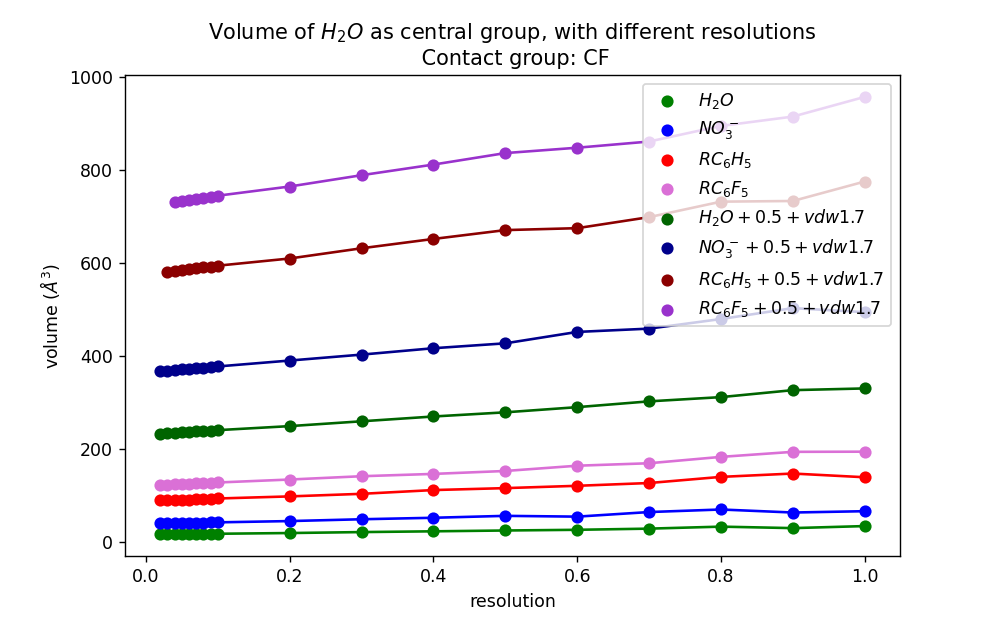

In [20]:
fig, ax = plt.subplots(figsize=(8,5))
plt.title("Volume of $H_2O$ as central group, with different resolutions\n Contact group: CF")

ax.scatter(resolutions, volumes.h2o_volume, label="$H_2O$", color='green')
ax.plot(resolutions, volumes.h2o_volume, color='green')
ax.scatter(resolutions, volumes.no3_volume, label="$NO_3^-$", color='blue')
ax.plot(resolutions, volumes.no3_volume, color='blue')
ax.scatter(resolutions, volumes.rc6h5_volume, label="$RC_6H_5$", color='red')
ax.plot(resolutions, volumes.rc6h5_volume, color='red')
ax.scatter(resolutions, volumes.rc6f5_volume, label="$RC_6F_5$", color='orchid')
ax.plot(resolutions, volumes.rc6f5_volume, color='orchid')

ax.scatter(volumes_max.resolution, volumes_max.h2o_volume, label="$H_2O + 0.5 + vdw 1.7$", color='darkgreen')
ax.plot(volumes_max.resolution, volumes_max.h2o_volume, color='darkgreen')
ax.scatter(volumes_max.resolution, volumes_max.no3_volume, label="$NO_3^-  + 0.5 + vdw 1.7$", color='darkblue')
ax.plot(volumes_max.resolution, volumes_max.no3_volume, color='darkblue')
ax.scatter(volumes_max.resolution, volumes_max.rc6h5_volume, label="$RC_6H_5  + 0.5 + vdw 1.7$", color='darkred')
ax.plot(volumes_max.resolution, volumes_max.rc6h5_volume, color='darkred')
ax.scatter(volumes_max.resolution, volumes_max.rc6f5_volume, label="$RC_6F_5  + 0.5 + vdw 1.7$", color='darkorchid')
ax.plot(volumes_max.resolution, volumes_max.rc6f5_volume, color='darkorchid')

ax.set_ylabel(r'volume ($\AA^3$)')
ax.set_xlabel("resolution")
ax.legend(loc='upper right')

plt.savefig('results/volumes.png', format='png')

<IPython.core.display.Javascript object>


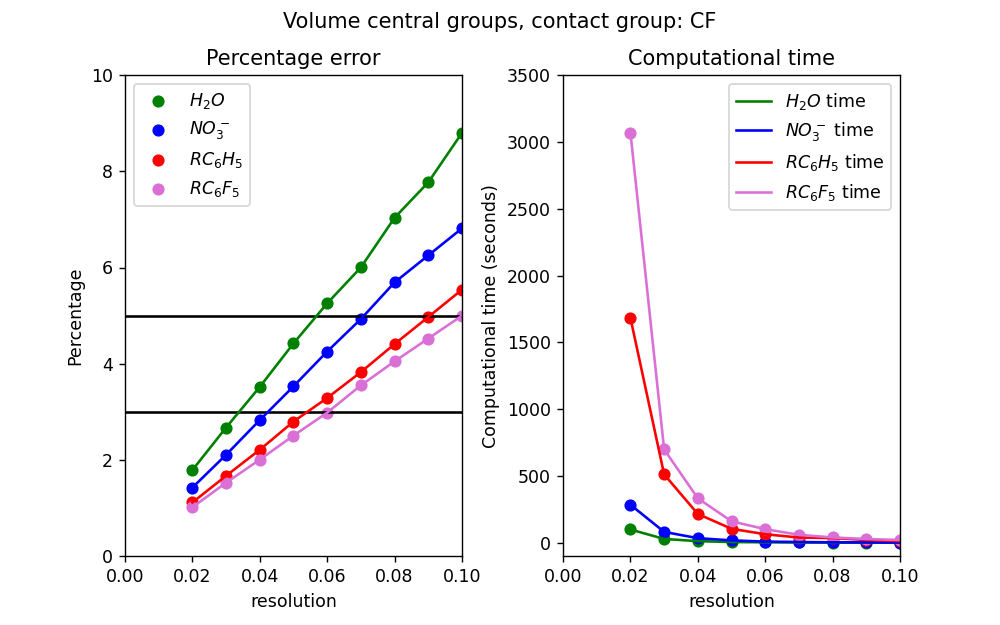

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,5))
plt.suptitle("Volume central groups, contact group: CF")

# plot absolute difference
ax1.scatter(resolutions, volumes.h2o_perc, label="$H_2O$", color='green')
ax1.plot(resolutions, volumes.h2o_perc, color='green')
ax1.scatter(resolutions, volumes.no3_perc, label="$NO_3^-$", color='blue')
ax1.plot(resolutions, volumes.no3_perc, color='blue')
ax1.scatter(resolutions, volumes.rc6h5_perc, label="$RC_6H_5$", color='red')
ax1.plot(resolutions, volumes.rc6h5_perc, color='red')
ax1.scatter(resolutions, volumes.rc6f5_perc, label="$RC_6F_5$", color='orchid')
ax1.plot(resolutions, volumes.rc6f5_perc, color='orchid')

ax1.set_ylim(0, 10)
ax1.set_xlim(0, 0.1)

# plot time
# ax2.set_yscale('log')
ax2.plot(resolutions, volumes.time_h2o, color='green', label="$H_2O$ time")
ax2.scatter(resolutions, volumes.time_h2o, color='green')
ax2.plot(resolutions, volumes.time_no3, color='blue', label='$NO_3^-$ time')
ax2.scatter(resolutions, volumes.time_no3, color='blue')
ax2.scatter(resolutions, volumes.time_rc6h5, color='red')
ax2.plot(resolutions, volumes.time_rc6h5, color='red', label="$RC_6H_5$ time")
ax2.scatter(resolutions, volumes.time_rc6f5, color='orchid')
ax2.plot(resolutions, volumes.time_rc6f5, color='orchid', label="$RC_6F_5$ time")
ax2.set_xlim(0, 0.1)
ax2.set_ylim(-100, 3500)
# ax2.vlines(0.03, 0, 100000, colors='black')

ax1.hlines(3, 0, 1, colors='black')
ax1.hlines(5, 0, 1, colors='black')

ax1.set_title('Percentage error')
ax2.set_title('Computational time')
ax2.set_ylabel('Computational time (seconds)')
ax2.set_xlabel('resolution')

ax1.set_ylabel(r'Percentage')
ax1.set_xlabel("resolution")

ax1.legend()
ax2.legend()

plt.subplots_adjust(wspace=0.3)
plt.savefig('results/volumes_error.png', format='png')

<IPython.core.display.Javascript object>


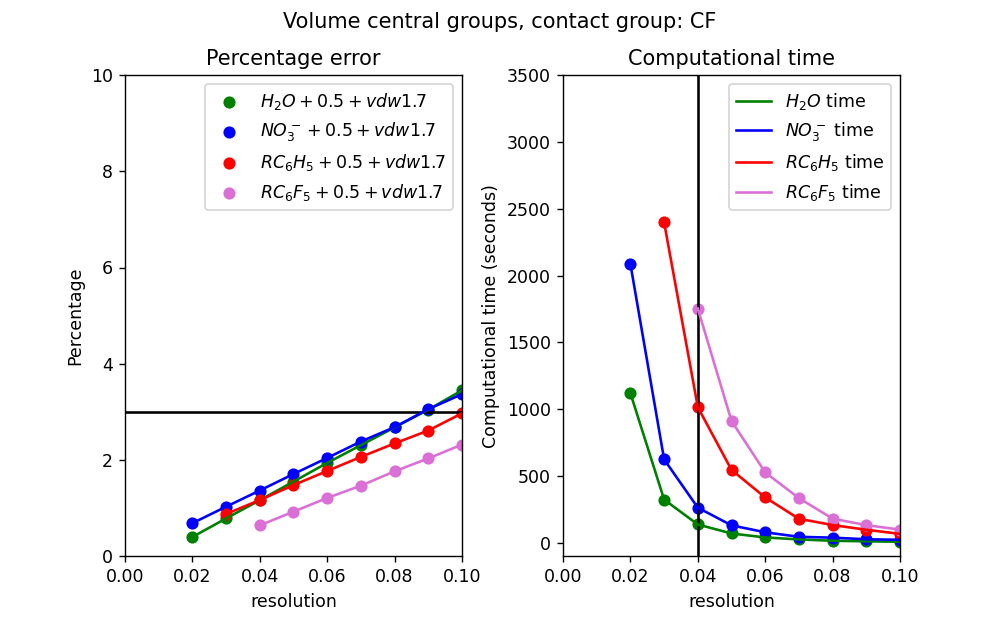

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,5))
plt.suptitle("Volume central groups, contact group: CF")

# plot absolute difference
ax1.scatter(volumes_max.resolution, volumes_max.h2o_perc, label="$H_2O + 0.5 + vdw1.7$", color='green')
ax1.plot(volumes_max.resolution, volumes_max.h2o_perc, color='green')
ax1.scatter(volumes_max.resolution, volumes_max.no3_perc, label="$NO_3^- + 0.5 + vdw1.7$", color='blue')
ax1.plot(volumes_max.resolution, volumes_max.no3_perc, color='blue')
ax1.scatter(volumes_max.resolution, volumes_max.rc6h5_perc, label="$RC_6H_5 + 0.5 + vdw1.7$", color='red')
ax1.plot(volumes_max.resolution, volumes_max.rc6h5_perc, color='red')
ax1.scatter(volumes_max.resolution, volumes_max.rc6f5_perc, label="$RC_6F_5 + 0.5 + vdw1.7$", color='orchid')
ax1.plot(volumes_max.resolution, volumes_max.rc6f5_perc, color='orchid')

ax1.set_ylim(0, 10)
ax1.set_xlim(0, 0.1)

# plot time
# ax2.set_yscale('log')
ax2.plot(volumes_max.resolution, volumes_max.time_h2o, color='green', label="$H_2O$ time")
ax2.scatter(volumes_max.resolution, volumes_max.time_h2o, color='green')
ax2.plot(volumes_max.resolution, volumes_max.time_no3, color='blue', label='$NO_3^-$ time')
ax2.scatter(volumes_max.resolution, volumes_max.time_no3, color='blue')
ax2.scatter(volumes_max.resolution, volumes_max.time_rc6h5, color='red')
ax2.plot(volumes_max.resolution, volumes_max.time_rc6h5, color='red', label="$RC_6H_5$ time")
ax2.scatter(volumes_max.resolution, volumes_max.time_rc6f5, color='orchid')
ax2.plot(volumes_max.resolution, volumes_max.time_rc6f5, color='orchid', label="$RC_6F_5$ time")

# ax2.plot(volumes_max.resolution, H2O_comp_time)

ax2.set_xlim(0, 0.1)
ax2.set_ylim(-100, 3500)
ax2.vlines(0.04, -1000, 100000, colors='black')

ax1.hlines(3, 0, 1, colors='black')
# ax1.hlines(3, 0, 1, colors='black')

ax1.set_title('Percentage error')
ax2.set_title('Computational time')
ax2.set_ylabel('Computational time (seconds)')
ax2.set_xlabel('resolution')

ax1.set_ylabel(r'Percentage')
ax1.set_xlabel("resolution")

ax1.legend()
ax2.legend()

plt.subplots_adjust(wspace=0.3)
plt.savefig('results/max_volumes_error.png', format='png')

<IPython.core.display.Javascript object>


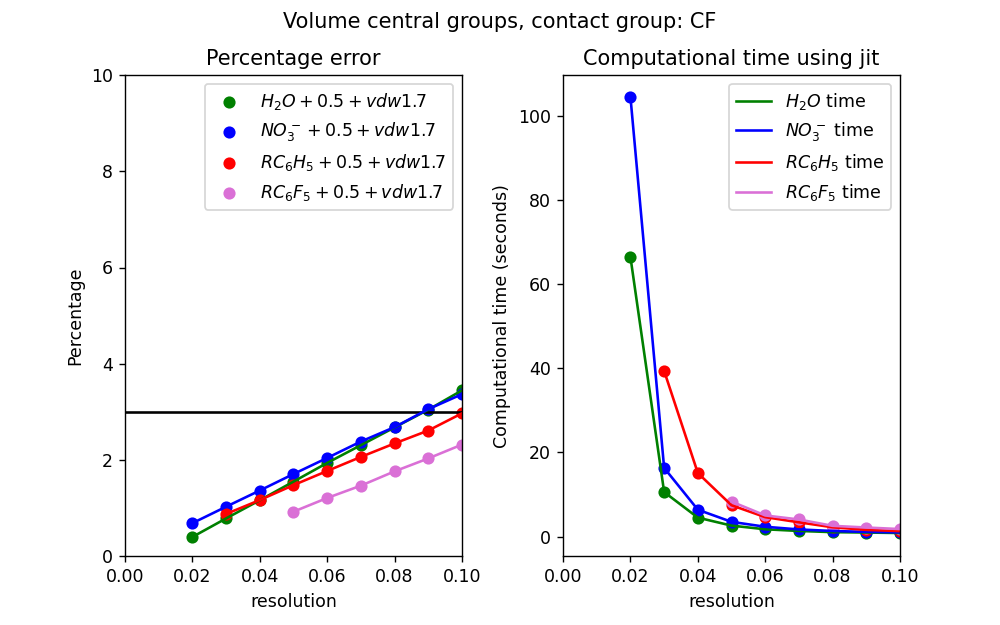

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,5))
plt.suptitle("Volume central groups, contact group: CF")

# plot absolute difference
ax1.scatter(volumes_max_jit.resolution, volumes_max_jit.h2o_perc, label="$H_2O + 0.5 + vdw1.7$", color='green')
ax1.plot(volumes_max_jit.resolution, volumes_max_jit.h2o_perc, color='green')
ax1.scatter(volumes_max_jit.resolution, volumes_max_jit.no3_perc, label="$NO_3^- + 0.5 + vdw1.7$", color='blue')
ax1.plot(volumes_max_jit.resolution, volumes_max_jit.no3_perc, color='blue')
ax1.scatter(volumes_max_jit.resolution, volumes_max_jit.rc6h5_perc, label="$RC_6H_5 + 0.5 + vdw1.7$", color='red')
ax1.plot(volumes_max_jit.resolution, volumes_max_jit.rc6h5_perc, color='red')
ax1.scatter(volumes_max_jit.resolution, volumes_max_jit.rc6f5_perc, label="$RC_6F_5 + 0.5 + vdw1.7$", color='orchid')
ax1.plot(volumes_max_jit.resolution, volumes_max_jit.rc6f5_perc, color='orchid')

ax1.set_ylim(0, 10)
ax1.set_xlim(0, 0.1)


ax2.plot(volumes_max_jit.resolution, volumes_max_jit.time_h2o, color='green', label="$H_2O$ time")
ax2.scatter(volumes_max_jit.resolution, volumes_max_jit.time_h2o, color='green')
ax2.plot(volumes_max_jit.resolution, volumes_max_jit.time_no3, color='blue', label='$NO_3^-$ time')
ax2.scatter(volumes_max_jit.resolution, volumes_max_jit.time_no3, color='blue')
ax2.scatter(volumes_max_jit.resolution, volumes_max_jit.time_rc6h5, color='red')
ax2.plot(volumes_max_jit.resolution, volumes_max_jit.time_rc6h5, color='red', label="$RC_6H_5$ time")
ax2.scatter(volumes_max_jit.resolution, volumes_max_jit.time_rc6f5, color='orchid')
ax2.plot(volumes_max_jit.resolution, volumes_max_jit.time_rc6f5, color='orchid', label="$RC_6F_5$ time")

# ax2.plot(volumes_max.resolution, H2O_comp_time)

ax2.set_xlim(0, 0.1)
# ax2.set_ylim(-100, 350)
# ax2.vlines(0.04, -1000, 100000, colors='black')

ax1.hlines(3, 0, 1, colors='black')
# ax1.hlines(3, 0, 1, colors='black')

ax1.set_title('Percentage error')
ax2.set_title('Computational time using jit')
ax2.set_ylabel('Computational time (seconds)')
ax2.set_xlabel('resolution')

ax1.set_ylabel(r'Percentage')
ax1.set_xlabel("resolution")

ax1.legend()
ax2.legend()

plt.subplots_adjust(wspace=0.3)
plt.savefig('results/max_volumes_jit_error.png', format='png')

In [24]:
display(volumes_max[volumes_max.resolution < 0.05])

volumes = volumes.reindex(index=volumes.index[::-1])
volumes = volumes.reset_index()

,resolution,bins_h2o,time_h2o,bins_no3,time_no3,bins_rc6h5,time_rc6h5,bins_rc6f5,time_rc6f5,h2o_volume,h2o_perc,no3_volume,no3_perc,rc6h5_volume,rc6h5_perc,rc6f5_volume,rc6f5_perc
15,0.04,3683048.0,137.558659,5790542.0,263.375918,9126741.0,1014.805906,11450931.0,1752.488556,235.715072,1.164148,370.594688,1.366098,584.111424,1.167829,732.859584,0.642222
16,0.03,8696935.0,323.699597,13679047.0,624.414618,21570613.0,2397.053682,NaN,NaN,234.817245,0.786248,369.334269,1.029493,582.406551,0.878519,NaN,NaN
17,0.02,29238445.0,1119.289945,46007752.0,2084.654886,NaN,NaN,NaN,NaN,233.907560,0.400397,368.062016,0.687389,NaN,NaN,NaN,NaN


,resolution,h2o_h_diff
0,1.00,217.0
1,0.90,274.0
2,0.80,384.0
3,0.70,542.0
4,0.60,831.0
5,0.50,1388.0
6,0.40,2563.0
7,0.30,5828.0
8,0.20,18719.0
9,0.10,143615.0


<IPython.core.display.Javascript object>


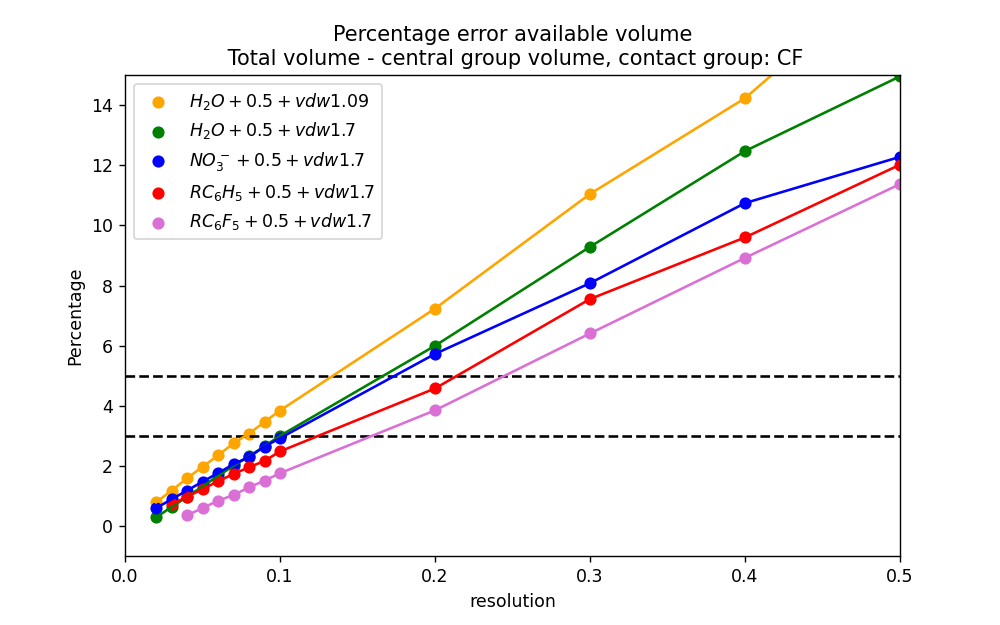

In [37]:
H2O_diff = real_water_max - real_water
NO3_diff = real_nitrate_max - real_nitrate
RC6H5_diff = real_aryl_max - real_aryl
RC6F5_diff = real_pentafluoroaryl_max - real_pentafluoroaryl
H2O_H_diff = real_water_H_max - real_water

# H2O_bins.reverse()
volumes_max['h2o_h_diff'] = H2O_bins
display(volumes_max[['resolution', 'h2o_h_diff']])
volumes_max['h2o_h_diff'] = volumes_max['h2o_h_diff'] * volumes_max['resolution']**3 - volumes.h2o_volume
volumes_max['h2o_h_perc_diff'] = abs((H2O_H_diff - volumes_max.h2o_h_diff) / volumes_max.h2o_h_diff * 100)

volumes_max['h2o_diff'] = (volumes_max.h2o_volume - volumes.h2o_volume)
volumes_max['h2o_perc_diff'] = abs((H2O_diff - volumes_max.h2o_diff) / volumes_max.h2o_diff * 100)

volumes_max['no3_diff'] = (volumes_max.no3_volume - volumes.no3_volume)
volumes_max['no3_perc_diff'] = abs((NO3_diff - volumes_max.no3_diff) / volumes_max.no3_diff * 100)

volumes_max['rc6h5_diff'] = (volumes_max.rc6h5_volume - volumes.rc6h5_volume )
volumes_max['rc6h5_perc_diff'] = abs((RC6H5_diff - volumes_max.rc6h5_diff) / volumes_max.rc6h5_diff * 100)

volumes_max['rc6f5_diff'] = (volumes_max.rc6f5_volume - volumes.rc6f5_volume )
volumes_max['rc6f5_perc_diff'] = abs((RC6F5_diff - volumes_max.rc6f5_diff) / volumes_max.rc6f5_diff * 100)


fig, ax1 = plt.subplots(figsize=(8,5))

# plot absolute difference
ax1.scatter(volumes_max.resolution, volumes_max.h2o_h_perc_diff, label="$H_2O + 0.5 + vdw1.09$", color='orange')
ax1.plot(volumes_max.resolution, volumes_max.h2o_h_perc_diff, color='orange')

ax1.scatter(volumes_max.resolution, volumes_max.h2o_perc_diff, label="$H_2O + 0.5 + vdw1.7$", color='green')
ax1.plot(volumes_max.resolution, volumes_max.h2o_perc_diff, color='green')

ax1.scatter(volumes_max.resolution, volumes_max.no3_perc_diff, label="$NO_3^- + 0.5 + vdw1.7$", color='blue')
ax1.plot(volumes_max.resolution, volumes_max.no3_perc_diff, color='blue')

ax1.scatter(volumes_max.resolution, volumes_max.rc6h5_perc_diff, label="$RC_6H_5 + 0.5 + vdw1.7$", color='red')
ax1.plot(volumes_max.resolution, volumes_max.rc6h5_perc_diff, color='red')

ax1.scatter(volumes_max.resolution, volumes_max.rc6f5_perc_diff, label="$RC_6F_5 + 0.5 + vdw1.7$", color='orchid')
ax1.plot(volumes_max.resolution, volumes_max.rc6f5_perc_diff, color='orchid')

ax1.set_ylim(-1, 15)
ax1.set_xlim(0, 0.5)
ax1.set_title('Percentage error available volume\n Total volume - central group volume, contact group: CF')
ax1.set_ylabel(r'Percentage')
ax1.set_xlabel("resolution")

ax1.hlines(5, 0, 1, colors='black', linestyles='dashed')
ax1.hlines(3, 0, 1, colors='black', linestyles='dashed')

ax1.legend()

plt.savefig('results/available_volume_error.png')

# Conclusion
We can use a resolution of 0.1 to estimate the available volume.